### Co2 Emissions for Light-duty Vehicle for Retail Sale in Canada

In [1]:
# Import necessary library
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# # Load the data
df = pd.read_csv("FuelConsumption.csv")
df.shape

(1067, 13)

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244



### Data information:

#### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR**
- **MAKE** 
- **MODEL**
- **VEHICLE CLASS**
- **ENGINE SIZE**
- **CYLINDERS**
- **TRANSMISSION**
- **FUEL CONSUMPTION in CITY(L/100 km)**
- **FUEL CONSUMPTION in HWY (L/100 km)**
- **FUEL CONSUMPTION COMB (L/100 km)**
- **CO2 EMISSIONS (g/km)**


### Exploratory Data Analysis (EDA)

#### Data Exploration

In [4]:
df.nunique(axis=0)

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

In [5]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
# Statistical data information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


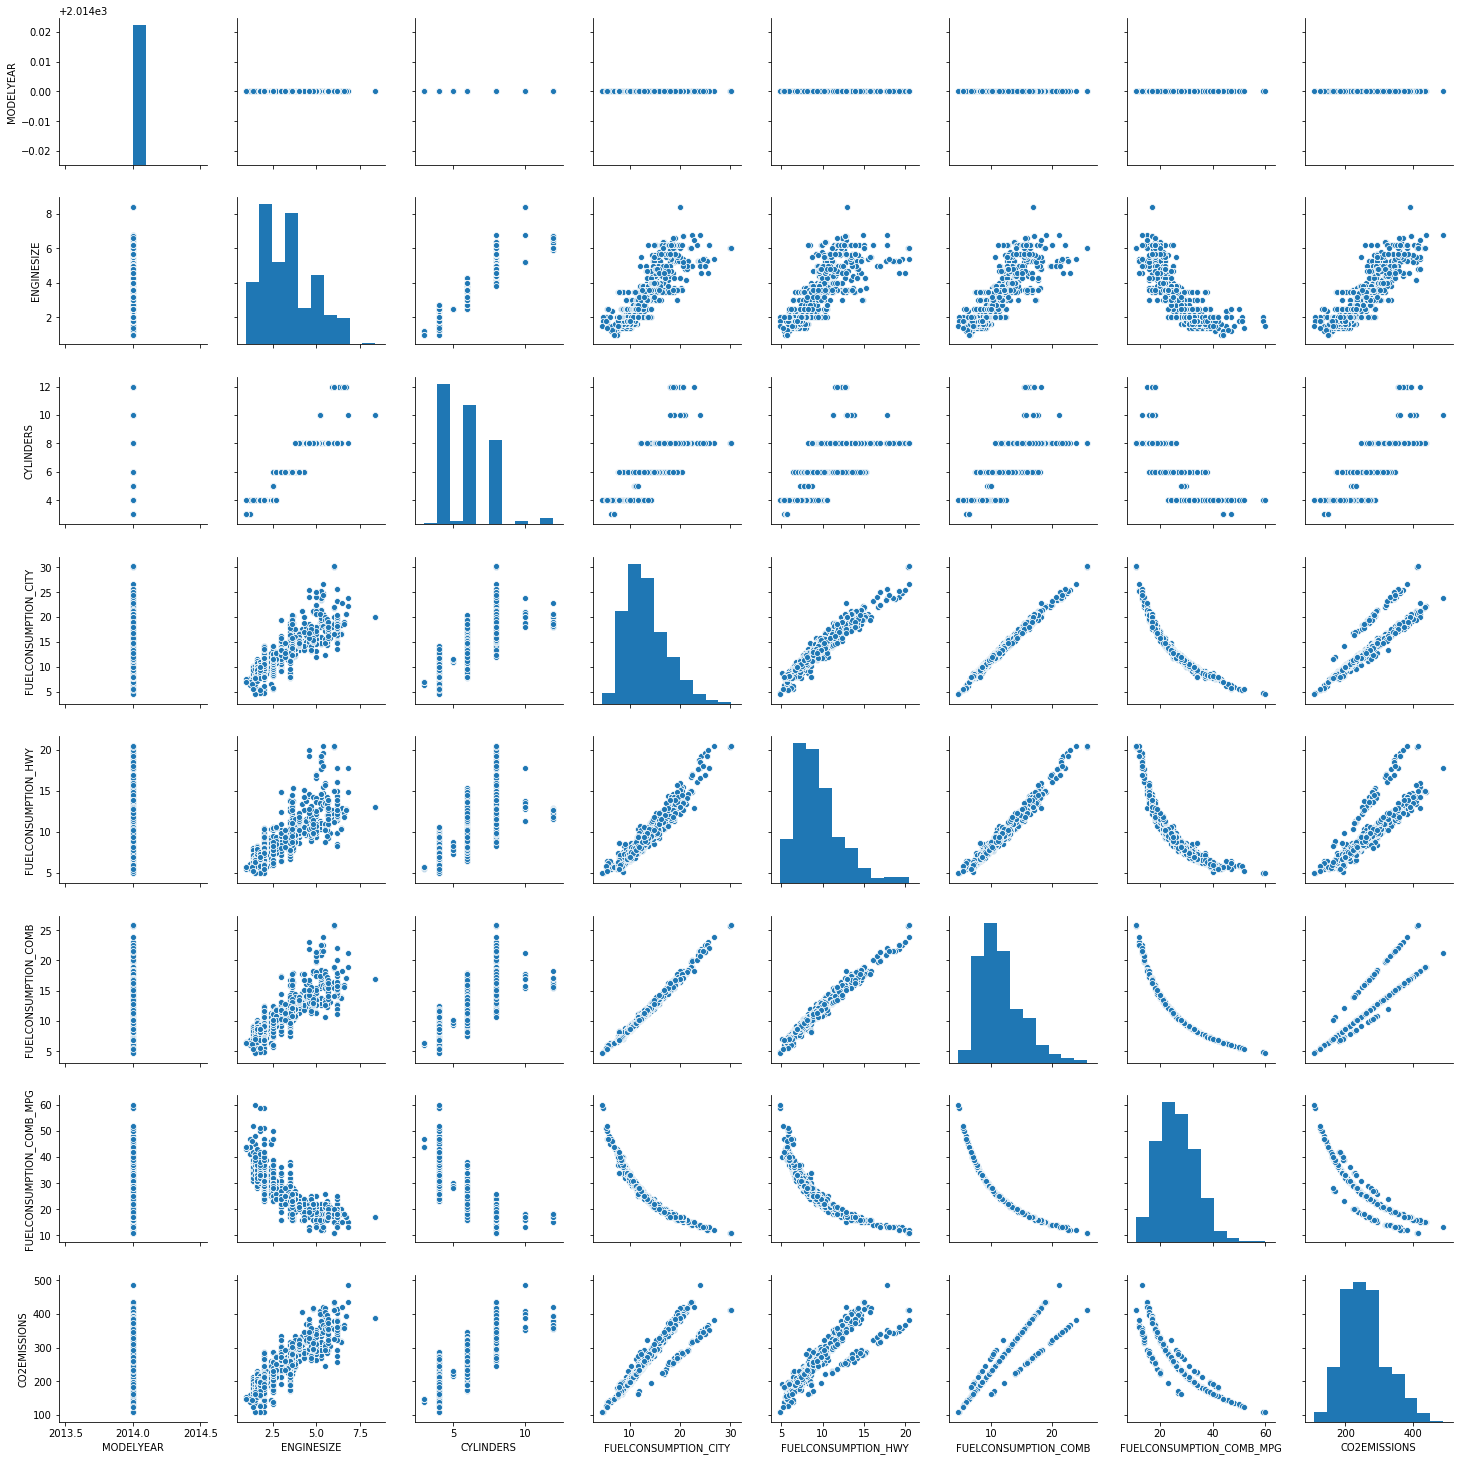

In [8]:
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(df)

C:\Users\ARMOUR\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


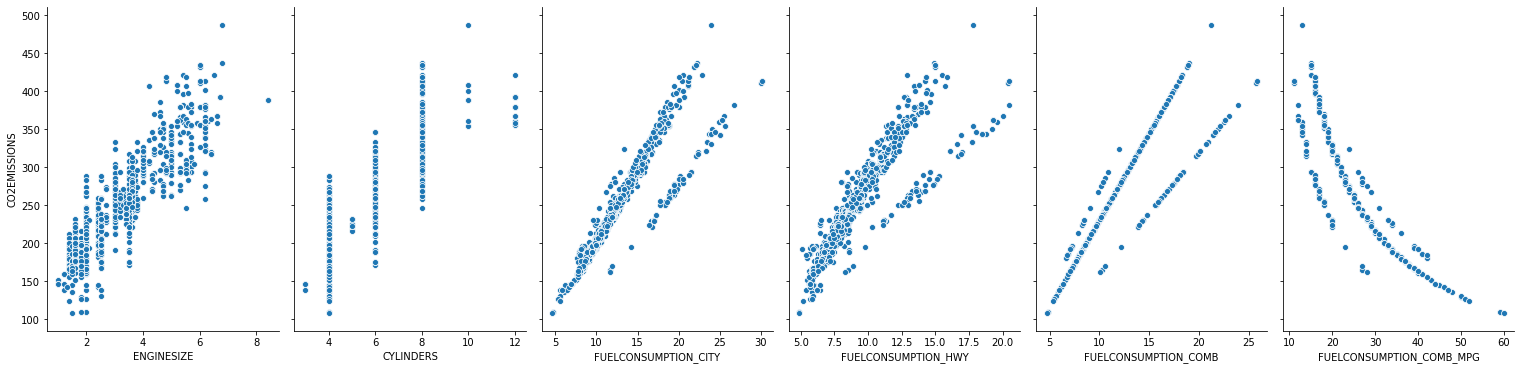

In [9]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars= ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG'], y_vars='CO2EMISSIONS',size=5, aspect=0.7, kind='scatter')

#### Missing value analysis

In [7]:
# Missing Value Analysis
missing_val = pd.DataFrame(df.isnull().sum())
missing_val

,0
MODELYEAR,0
MAKE,0
MODEL,0
VEHICLECLASS,0
ENGINESIZE,0
CYLINDERS,0
TRANSMISSION,0
FUELTYPE,0
FUELCONSUMPTION_CITY,0
FUELCONSUMPTION_HWY,0


#### Outlier and Skewness Checking and Analysis of contineous variables

In [10]:
print(df['ENGINESIZE'].skew())
df['ENGINESIZE'].describe()

0.5678417900131225


count    1067.000000
mean        3.346298
std         1.415895
min         1.000000
25%         2.000000
50%         3.400000
75%         4.300000
max         8.400000
Name: ENGINESIZE, dtype: float64

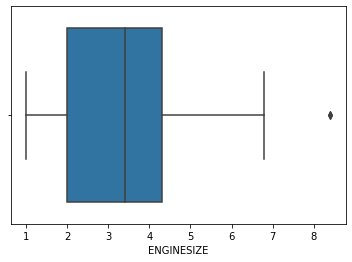

In [11]:
sns.boxplot(df['ENGINESIZE']);

In [12]:
print(df['CYLINDERS'].skew())
df['CYLINDERS'].describe()

0.7957543138484844


count    1067.000000
mean        5.794752
std         1.797447
min         3.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: CYLINDERS, dtype: float64

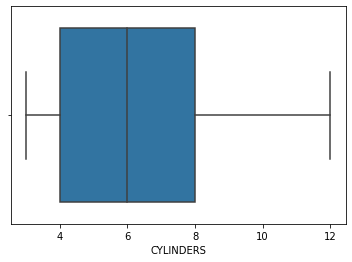

In [13]:
sns.boxplot(df['CYLINDERS']);

In [14]:
print(df['FUELCONSUMPTION_CITY'].skew())
df['FUELCONSUMPTION_CITY'].describe()

0.900628912739179


count    1067.000000
mean       13.296532
std         4.101253
min         4.600000
25%        10.250000
50%        12.600000
75%        15.550000
max        30.200000
Name: FUELCONSUMPTION_CITY, dtype: float64

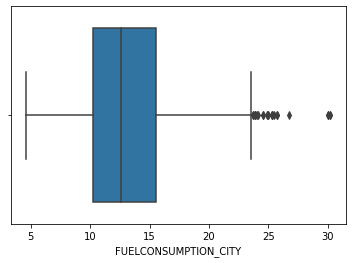

In [15]:
sns.boxplot(df['FUELCONSUMPTION_CITY']);

In [16]:
print(df['FUELCONSUMPTION_HWY'].skew())
df['FUELCONSUMPTION_HWY'].describe()

1.2638588666030313


count    1067.000000
mean        9.474602
std         2.794510
min         4.900000
25%         7.500000
50%         8.800000
75%        10.850000
max        20.500000
Name: FUELCONSUMPTION_HWY, dtype: float64

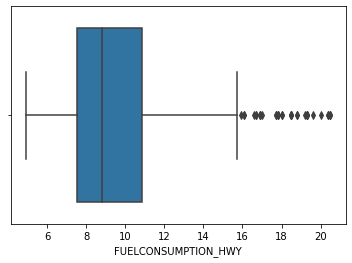

In [17]:
sns.boxplot(df['FUELCONSUMPTION_HWY']);

In [18]:
print(df['FUELCONSUMPTION_COMB'].skew())
df['FUELCONSUMPTION_COMB'].describe()

1.032592476277465


count    1067.000000
mean       11.580881
std         3.485595
min         4.700000
25%         9.000000
50%        10.900000
75%        13.350000
max        25.800000
Name: FUELCONSUMPTION_COMB, dtype: float64

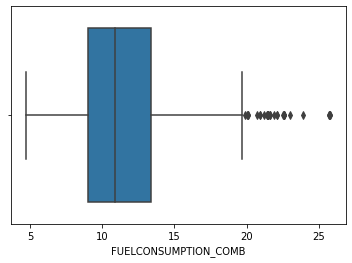

In [19]:
sns.boxplot(df['FUELCONSUMPTION_COMB']);

In [20]:
print(df['FUELCONSUMPTION_COMB_MPG'].skew())
df['FUELCONSUMPTION_HWY'].describe()

0.5854088389391882


count    1067.000000
mean        9.474602
std         2.794510
min         4.900000
25%         7.500000
50%         8.800000
75%        10.850000
max        20.500000
Name: FUELCONSUMPTION_HWY, dtype: float64

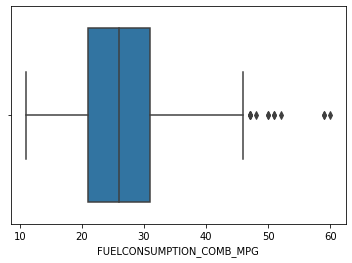

In [21]:
sns.boxplot(df['FUELCONSUMPTION_COMB_MPG']);

In [22]:
cdf = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']

In [23]:
for i in cdf:
    print(i)
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    df = df.drop(df[df.loc[:,i] < min].index)
    df = df.drop(df[df.loc[:,i] > max].index)

ENGINESIZE
-1.4499999999999997
7.75
CYLINDERS
-2.0
14.0
FUELCONSUMPTION_CITY
2.2499999999999982
23.450000000000003
FUELCONSUMPTION_HWY
3.1499999999999995
14.75
FUELCONSUMPTION_COMB
3.237499999999998
18.5375
FUELCONSUMPTION_COMB_MPG
8.125
45.125


In [24]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [25]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


                          ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  \
ENGINESIZE                  1.000000   0.933100              0.849347   
CYLINDERS                   0.933100   1.000000              0.827561   
FUELCONSUMPTION_CITY        0.849347   0.827561              1.000000   
FUELCONSUMPTION_HWY         0.802812   0.757531              0.956131   
FUELCONSUMPTION_COMB        0.841460   0.811262              0.994628   
FUELCONSUMPTION_COMB_MPG   -0.823797  -0.782895             -0.960548   

                          FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  \
ENGINESIZE                           0.802812              0.841460   
CYLINDERS                            0.757531              0.811262   
FUELCONSUMPTION_CITY                 0.956131              0.994628   
FUELCONSUMPTION_HWY                  1.000000              0.981166   
FUELCONSUMPTION_COMB                 0.981166              1.000000   
FUELCONSUMPTION_COMB_MPG            -0.939460             -0.9

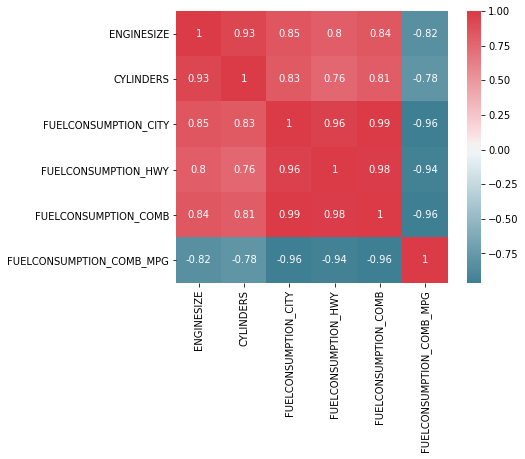

In [26]:
##Correlation analysis

df_corr = df.loc[:,cdf]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
print(corr)

#### Dealing with Categorical variables

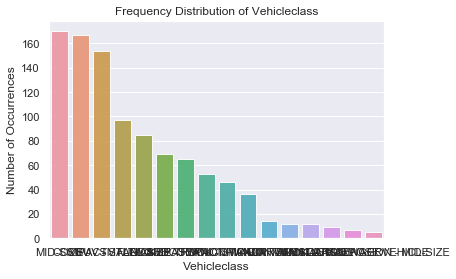

In [27]:
carrier_count = df['VEHICLECLASS'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=.9)
plt.title('Frequency Distribution of Vehicleclass')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Vehicleclass', fontsize=12)
plt.show()

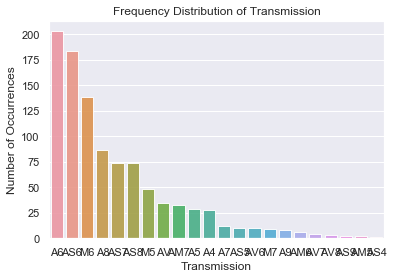

In [28]:
carrier_count = df['TRANSMISSION'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=.9)
plt.title('Frequency Distribution of Transmission')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Transmission', fontsize=12)
plt.show()

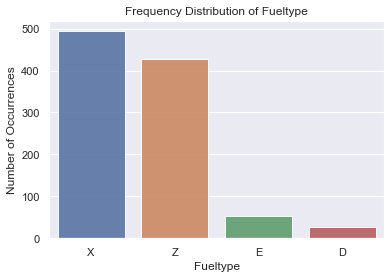

In [29]:
carrier_count = df['FUELTYPE'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=.9)
plt.title('Frequency Distribution of Fueltype')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Fueltype', fontsize=12)
plt.show()

In [30]:
cat_name = ['VEHICLECLASS','TRANSMISSION','FUELTYPE']

In [31]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Anova
Anova = ols('CO2EMISSIONS ~ C(VEHICLECLASS) + C(TRANSMISSION) + C(FUELTYPE)', data = df).fit()
print(sm.stats.anova_lm(Anova, typ=2))

                       sum_sq     df          F        PR(>F)
C(VEHICLECLASS)  1.002573e+06   15.0  41.508138  2.092459e-93
C(TRANSMISSION)  2.408971e+05   21.0   7.123951  1.151131e-19
C(FUELTYPE)      2.129622e+05    3.0  44.084907  1.074483e-26
Residual         1.547443e+06  961.0        NaN           NaN


In [32]:
df = df.drop(['MODELYEAR','MAKE','MODEL','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG'], axis=1)

In [34]:
df.head()

,VEHICLECLASS,ENGINESIZE,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,COMPACT,2.0,AS5,Z,9.9,196
1,COMPACT,2.4,M6,Z,11.2,221
3,SUV - SMALL,3.5,AS6,Z,12.7,255
4,SUV - SMALL,3.5,AS6,Z,12.1,244
5,MID-SIZE,3.5,AS6,Z,11.9,230


In [35]:
cat_df= df.select_dtypes(include=['object']).copy()

In [36]:
cat_df.shape

(1001, 3)

In [37]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_df['VEHICLECLASS'])
lb_results_df_1 = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df_1.head())

   COMPACT  FULL-SIZE  MID-SIZE  MINICOMPACT  MINIVAN  PICKUP TRUCK - SMALL  \
0        1          0         0            0        0                     0   
1        1          0         0            0        0                     0   
2        0          0         0            0        0                     0   
3        0          0         0            0        0                     0   
4        0          0         1            0        0                     0   

   PICKUP TRUCK - STANDARD  SPECIAL PURPOSE VEHICLE  STATION WAGON - MID-SIZE  \
0                        0                        0                         0   
1                        0                        0                         0   
2                        0                        0                         0   
3                        0                        0                         0   
4                        0                        0                         0   

   STATION WAGON - SMALL  SUBCOMPACT  

In [38]:
lb_results_df_1.shape

(1001, 16)

In [39]:
lb_results = lb.fit_transform(cat_df['TRANSMISSION'])
lb_results_df_2 = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df_2.head())

   A4  A5  A6  A7  A8  A9  AM5  AM6  AM7  AS4  ...  AS7  AS8  AS9  AV  AV6  \
0   0   0   0   0   0   0    0    0    0    0  ...    0    0    0   0    0   
1   0   0   0   0   0   0    0    0    0    0  ...    0    0    0   0    0   
2   0   0   0   0   0   0    0    0    0    0  ...    0    0    0   0    0   
3   0   0   0   0   0   0    0    0    0    0  ...    0    0    0   0    0   
4   0   0   0   0   0   0    0    0    0    0  ...    0    0    0   0    0   

   AV7  AV8  M5  M6  M7  
0    0    0   0   0   0  
1    0    0   0   1   0  
2    0    0   0   0   0  
3    0    0   0   0   0  
4    0    0   0   0   0  

[5 rows x 22 columns]


In [40]:
lb_results_df_2.shape

(1001, 22)

In [41]:
lb_results = lb.fit_transform(cat_df['FUELTYPE'])
lb_results_df_3 = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df_3.head())

   D  E  X  Z
0  0  0  0  1
1  0  0  0  1
2  0  0  0  1
3  0  0  0  1
4  0  0  0  1


In [42]:
lb_results_df_3.shape

(1001, 4)

In [43]:
cont_df = df[['ENGINESIZE','FUELCONSUMPTION_CITY','CO2EMISSIONS']]

In [44]:
result_df = pd.concat([lb_results_df_1,lb_results_df_2,lb_results_df_3], axis=1)

In [45]:
result_df.shape

(1001, 42)

In [46]:
final_df = pd.concat([cont_df,result_df],axis=1)
final_df.shape

(1066, 45)

In [47]:
final_df.isna().sum()

ENGINESIZE                  65
FUELCONSUMPTION_CITY        65
CO2EMISSIONS                65
COMPACT                     65
FULL-SIZE                   65
MID-SIZE                    65
MINICOMPACT                 65
MINIVAN                     65
PICKUP TRUCK - SMALL        65
PICKUP TRUCK - STANDARD     65
SPECIAL PURPOSE VEHICLE     65
STATION WAGON - MID-SIZE    65
STATION WAGON - SMALL       65
SUBCOMPACT                  65
SUV - SMALL                 65
SUV - STANDARD              65
TWO-SEATER                  65
VAN - CARGO                 65
VAN - PASSENGER             65
A4                          65
A5                          65
A6                          65
A7                          65
A8                          65
A9                          65
AM5                         65
AM6                         65
AM7                         65
AS4                         65
AS5                         65
AS6                         65
AS7                         65
AS8     

In [48]:
final_df = final_df.dropna()
print(final_df.shape)

(936, 45)


In [49]:
final_df.head(20)

,ENGINESIZE,FUELCONSUMPTION_CITY,CO2EMISSIONS,COMPACT,FULL-SIZE,MID-SIZE,MINICOMPACT,MINIVAN,PICKUP TRUCK - SMALL,PICKUP TRUCK - STANDARD,...,AV6,AV7,AV8,M5,M6,M7,D,E,X,Z
0,2.0,9.9,196.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,11.2,221.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3.5,12.7,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.5,12.1,244.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,3.5,11.9,230.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,3.5,11.8,232.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,3.7,12.8,255.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,3.7,13.4,267.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,2.4,10.6,212.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
10,2.4,11.2,225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Feature Scaling

In [50]:
#Standarisation
cnames = ['ENGINESIZE','FUELCONSUMPTION_CITY']
for i in cnames:
    print(i)
    final_df[i] = (final_df[i] - final_df[i].mean())/final_df[i].std()

ENGINESIZE
FUELCONSUMPTION_CITY


In [51]:
final_df.head()

,ENGINESIZE,FUELCONSUMPTION_CITY,CO2EMISSIONS,COMPACT,FULL-SIZE,MID-SIZE,MINICOMPACT,MINIVAN,PICKUP TRUCK - SMALL,PICKUP TRUCK - STANDARD,...,AV6,AV7,AV8,M5,M6,M7,D,E,X,Z
0,-0.955836,-0.911887,196.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.662648,-0.527789,221.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.143618,-0.084598,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.143618,-0.261874,244.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.143618,-0.320966,230.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Model Development

In [52]:
X = final_df.drop(['CO2EMISSIONS'], axis=1)
y = final_df['ENGINESIZE']

print(X.shape)
print(y.shape)

(936, 44)
(936,)


In [53]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

#### Performing Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
# Model evaluation
# print the intercept
print(lm.intercept_)

3.9898639947466563e-17


In [56]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
ENGINESIZE,1.000000e+00
FUELCONSUMPTION_CITY,-3.837062e-16
COMPACT,-6.393171e-16
FULL-SIZE,1.223829e-16
MID-SIZE,-1.299025e-16
MINICOMPACT,1.563108e-17
MINIVAN,-1.858451e-16
PICKUP TRUCK - SMALL,-3.608906e-17
PICKUP TRUCK - STANDARD,1.316870e-16
SPECIAL PURPOSE VEHICLE,4.831887e-17


In [57]:
# Making predictions using the model
y_pred = lm.predict(X_test)

In [58]:
df_pred= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
336,-1.395617,-1.395617
71,1.976041,1.976041
215,1.462963,1.462963
710,-0.589351,-0.589351
739,-0.882539,-0.882539
...,...,...
903,-0.222866,-0.222866
3,0.143618,0.143618
501,0.143618,0.143618
353,0.143618,0.143618


In [60]:
# Calculating error terms
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [61]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1.2498978009826715e-30
r_square_value : 1.0


In [63]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.946744054825064e-16
Mean Squared Error: 1.2498978009826715e-30
Root Mean Squared Error: 1.1179882830256637e-15


- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

As our model R-squared is best possible fit thats why we are getting 1.0 value.